In [1]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GroupKFold

my_cv = StratifiedShuffleSplit(n_splits=5, train_size=0.7, test_size=0.3)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
activity_codes_mapping = {'A': 'walking',
                          'B': 'jogging',
                          'C': 'stairs',
                          'D': 'sitting',
                          'E': 'standing',
                          'F': 'typing',
                          'G': 'brushing teeth',
                          'H': 'eating soup',
                          'I': 'eating chips',
                          'J': 'eating pasta',
                          'K': 'drinking from cup',
                          'L': 'eating sandwich',
                          'M': 'kicking soccer ball',
                          'O': 'playing catch tennis ball',
                          'P': 'dribbling basket ball',
                          'Q': 'writing',
                          'R': 'clapping',
                          'S': 'folding clothes'}

activity_color_map = {activity_codes_mapping['A']: 'lime',
                      activity_codes_mapping['B']: 'red',
                      activity_codes_mapping['C']: 'blue',
                      activity_codes_mapping['D']: 'orange',
                      activity_codes_mapping['E']: 'yellow',
                      activity_codes_mapping['F']: 'lightgreen',
                      activity_codes_mapping['G']: 'greenyellow',
                      activity_codes_mapping['H']: 'magenta',
                      activity_codes_mapping['I']: 'gold',
                      activity_codes_mapping['J']: 'cyan',
                      activity_codes_mapping['K']: 'purple',
                      activity_codes_mapping['L']: 'lightgreen',
                      activity_codes_mapping['M']: 'violet',
                      activity_codes_mapping['O']: 'limegreen',
                      activity_codes_mapping['P']: 'deepskyblue',   
                      activity_codes_mapping['Q']: 'mediumspringgreen',
                      activity_codes_mapping['R']: 'plum',
                      activity_codes_mapping['S']: 'olive'}

In [4]:
raw_par_10_phone_accel = pd.read_csv(r'DATA/phone/accel/data_1610_accel_phone.txt', names = ['participant_id' , 'activity_code' , 'timestamp', 'x', 'y', 'z'], index_col=None, header=None)

raw_par_10_phone_accel.z = raw_par_10_phone_accel.z.str.strip(';')
raw_par_10_phone_accel.z = pd.to_numeric(raw_par_10_phone_accel.z)

raw_par_10_phone_accel['activity'] = raw_par_10_phone_accel['activity_code'].map(activity_codes_mapping)

raw_par_10_phone_accel = raw_par_10_phone_accel[['participant_id', 'activity_code', 'activity', 'timestamp', 'x', 'y', 'z']]

raw_par_10_phone_accel

,participant_id,activity_code,activity,timestamp,x,y,z
0,1610,A,walking,18687441561967,1.174957,13.347473,-4.034637
1,1610,A,walking,18687491915971,1.408188,7.091858,-3.895721
2,1610,A,walking,18687542269974,4.932510,6.306808,-2.339005
3,1610,A,walking,18687592623978,0.154648,6.123505,-1.831467
4,1610,A,walking,18687642977982,-2.826035,4.180542,-3.211899
...,...,...,...,...,...,...,...
80865,1610,S,folding clothes,17989031516129,5.946732,7.583008,-1.097260
80866,1610,S,folding clothes,17989081870133,5.818741,7.804871,-1.623733
80867,1610,S,folding clothes,17989132224137,5.530823,7.636093,-1.662643
80868,1610,S,folding clothes,17989182578141,5.802170,7.645752,-1.000412


In [5]:
raw_par_20_watch_accel = pd.read_csv(r'DATA/watch/accel/data_1620_accel_watch.txt', names = ['participant_id' , 'activity_code' , 'timestamp', 'x', 'y', 'z'], index_col=None, header=None)

raw_par_20_watch_accel.z = raw_par_20_watch_accel.z.str.strip(';')
raw_par_20_watch_accel.z = pd.to_numeric(raw_par_20_watch_accel.z)

raw_par_20_watch_accel['activity'] = raw_par_20_watch_accel['activity_code'].map(activity_codes_mapping)

raw_par_20_watch_accel = raw_par_20_watch_accel[['participant_id', 'activity_code', 'activity', 'timestamp', 'x', 'y', 'z']]

raw_par_20_watch_accel

,participant_id,activity_code,activity,timestamp,x,y,z
0,1620,A,walking,37945621841814,3.417424,-2.164957,-4.849306
1,1620,A,walking,37945671341814,5.423765,-6.936601,-4.954651
2,1620,A,walking,37945720841814,4.700716,-3.127426,-7.648128
3,1620,A,walking,37945770341814,8.033444,-4.700417,-5.024083
4,1620,A,walking,37945819841814,3.970484,-1.645415,-3.621080
...,...,...,...,...,...,...,...
67189,1620,S,folding clothes,42368439960621,6.524798,-4.589834,0.573262
67190,1620,S,folding clothes,42368489889911,9.100959,-4.168455,-0.602291
67191,1620,S,folding clothes,42368539819201,7.590218,-5.736657,-1.854459
67192,1620,S,folding clothes,42368589748491,8.681973,-6.284929,-5.180005


In [6]:
raw_par_35_phone_ang_vel = pd.read_csv(r'DATA/phone/gyro/data_1635_gyro_phone.txt', names = ['participant_id' , 'activity_code' , 'timestamp', 'x', 'y', 'z'], index_col=None, header=None)

raw_par_35_phone_ang_vel.z = raw_par_35_phone_ang_vel.z.str.strip(';')
raw_par_35_phone_ang_vel.z = pd.to_numeric(raw_par_35_phone_ang_vel.z)

raw_par_35_phone_ang_vel['activity'] = raw_par_35_phone_ang_vel['activity_code'].map(activity_codes_mapping)

raw_par_35_phone_ang_vel = raw_par_35_phone_ang_vel[['participant_id', 'activity_code', 'activity', 'timestamp', 'x', 'y', 'z']]

raw_par_35_phone_ang_vel

,participant_id,activity_code,activity,timestamp,x,y,z
0,1635,A,walking,676165107876419,0.874725,-0.098099,0.807510
1,1635,A,walking,676165158230423,0.563431,-1.359665,1.432419
2,1635,A,walking,676165208584427,1.507690,-3.086883,0.679016
3,1635,A,walking,676165258938431,1.430603,-1.860306,0.451035
4,1635,A,walking,676165309292435,0.325165,-1.735611,0.252365
...,...,...,...,...,...,...,...
64530,1635,S,folding clothes,680277872380268,-0.119614,-0.032928,0.129654
64531,1635,S,folding clothes,680277922750286,-0.500427,-0.465652,0.098923
64532,1635,S,folding clothes,680277973104290,-0.768646,-0.448929,0.063583
64533,1635,S,folding clothes,680278023458294,-0.786408,-0.346924,0.099899


In [7]:
raw_par_45_watch_ang_vel = pd.read_csv(r'DATA/watch/gyro/data_1635_gyro_watch.txt', names = ['participant_id' , 'activity_code' , 'timestamp', 'x', 'y', 'z'], index_col=None, header=None)

raw_par_45_watch_ang_vel.z = raw_par_45_watch_ang_vel.z.str.strip(';')
raw_par_45_watch_ang_vel.z = pd.to_numeric(raw_par_45_watch_ang_vel.z)

raw_par_45_watch_ang_vel['activity'] = raw_par_45_watch_ang_vel['activity_code'].map(activity_codes_mapping)

raw_par_45_watch_ang_vel = raw_par_45_watch_ang_vel[['participant_id', 'activity_code', 'activity', 'timestamp', 'x', 'y', 'z']]

raw_par_45_watch_ang_vel

,participant_id,activity_code,activity,timestamp,x,y,z
0,1635,A,walking,64768437041043,0.117911,-0.145542,-1.300821
1,1635,A,walking,64768486541043,1.038300,-0.455534,-1.134640
2,1635,A,walking,64768536041043,0.876380,-0.541820,-0.844888
3,1635,A,walking,64768585541043,0.912599,-0.388422,-0.394281
4,1635,A,walking,64768635041043,0.048669,-0.046472,0.288554
...,...,...,...,...,...,...,...
64853,1635,S,folding clothes,68881084984774,-0.426159,0.298781,2.808190
64854,1635,S,folding clothes,68881134912344,1.008752,-0.439448,2.320299
64855,1635,S,folding clothes,68881184839914,0.938445,-0.437317,1.726947
64856,1635,S,folding clothes,68881234767484,1.552037,-0.296702,1.282731


In [8]:
features = ['ACTIVITY',
            'X0', # 1st bin fraction of x axis acceleration distribution
            'X1', # 2nd bin fraction ...
            'X2',
            'X3',
            'X4',
            'X5',
            'X6',
            'X7',
            'X8',
            'X9',
            'Y0', # 1st bin fraction of y axis acceleration distribution
            'Y1', # 2nd bin fraction ...
            'Y2',
            'Y3',
            'Y4',
            'Y5',
            'Y6',
            'Y7',
            'Y8',
            'Y9',
            'Z0', # 1st bin fraction of z axis acceleration distribution
            'Z1', # 2nd bin fraction ...
            'Z2',
            'Z3',
            'Z4',
            'Z5',
            'Z6',
            'Z7',
            'Z8',
            'Z9',
            'XAVG', # average sensor value over the window (per axis)
            'YAVG',
            'ZAVG',
            'XPEAK', # Time in milliseconds between the peaks in the wave associated with most activities. heuristically determined (per axis)
            'YPEAK',
            'ZPEAK',
            'XABSOLDEV', # Average absolute difference between the each of the 200 readings and the mean of those values (per axis)
            'YABSOLDEV',
            'ZABSOLDEV',
            'XSTANDDEV', # Standard deviation of the 200 window's values (per axis)  ***BUG!***
            'YSTANDDEV',
            'ZSTANDDEV',
            'XVAR', # Variance of the 200 window's values (per axis)   ***BUG!***
            'YVAR',
            'ZVAR',
            'XMFCC0', # short-term power spectrum of a wave, based on a linear cosine transform of a log power spectrum on a non-linear mel scale of frequency (13 values per axis)
            'XMFCC1',
            'XMFCC2',
            'XMFCC3',
            'XMFCC4',
            'XMFCC5',
            'XMFCC6',
            'XMFCC7',
            'XMFCC8',
            'XMFCC9',
            'XMFCC10',
            'XMFCC11',
            'XMFCC12',
            'YMFCC0', # short-term power spectrum of a wave, based on a linear cosine transform of a log power spectrum on a non-linear mel scale of frequency (13 values per axis)
            'YMFCC1',
            'YMFCC2',
            'YMFCC3',
            'YMFCC4',
            'YMFCC5',
            'YMFCC6',
            'YMFCC7',
            'YMFCC8',
            'YMFCC9',
            'YMFCC10',
            'YMFCC11',
            'YMFCC12',
            'ZMFCC0', # short-term power spectrum of a wave, based on a linear cosine transform of a log power spectrum on a non-linear mel scale of frequency (13 values per axis)
            'ZMFCC1',
            'ZMFCC2',
            'ZMFCC3',
            'ZMFCC4',
            'ZMFCC5',
            'ZMFCC6',
            'ZMFCC7',
            'ZMFCC8',
            'ZMFCC9',
            'ZMFCC10',
            'ZMFCC11',
            'ZMFCC12',
            'XYCOS', # The cosine distances between sensor values for pairs of axes (three pairs of axes)
            'XZCOS',
            'YZCOS',
            'XYCOR', # The correlation between sensor values for pairs of axes (three pairs of axes)
            'XZCOR',
            'YZCOR',
            'RESULTANT', # Average resultant value, computed by squaring each matching x, y, and z value, summing them, taking the square root, and then averaging these values over the 200 readings
            'PARTICIPANT'] # Categirical: 1600 -1650

len(features)

93

In [9]:
import glob

#the duplicate files to be ignored; all identical to 1600
duplicate_files = [str(i) for i in range(1611, 1618)] # '1611',...'1617'

path = r'DATA/signals/phone/accel'
all_files = glob.glob(path + "/*.arff")

list_dfs_phone_accel = []

for filename in all_files:

    if any(dup_fn in filename for dup_fn in duplicate_files):
        continue #ignore the duplicate files
    df = pd.read_csv(filename, names = features, skiprows = 96, index_col=None, header=0)
    list_dfs_phone_accel.append(df)

all_phone_accel = pd.concat(list_dfs_phone_accel, axis=0, ignore_index=True, sort=False)

all_phone_accel


,ACTIVITY,X0,X1,X2,X3,X4,X5,X6,X7,X8,...,ZMFCC11,ZMFCC12,XYCOS,XZCOS,YZCOS,XYCOR,XZCOR,YZCOR,RESULTANT,PARTICIPANT
0,A,0.235,0.470,0.275,0.020,0.000,0.0,0.0,0.0,0.0,...,0.486106,0.479859,-0.550668,0.049864,0.121354,-0.251024,0.164468,-0.110722,10.05180,1600
1,A,0.275,0.440,0.270,0.015,0.000,0.0,0.0,0.0,0.0,...,0.479571,0.473409,-0.633171,0.072129,0.161492,-0.386416,0.215680,-0.034375,10.11710,1600
2,A,0.320,0.430,0.245,0.000,0.005,0.0,0.0,0.0,0.0,...,0.483005,0.476798,-0.659493,0.087043,0.162157,-0.325151,0.272380,-0.077274,9.98384,1600
3,A,0.315,0.495,0.185,0.005,0.000,0.0,0.0,0.0,0.0,...,0.480711,0.474534,-0.712081,0.003810,0.210015,-0.364285,0.203131,0.015328,10.10600,1600
4,A,0.215,0.455,0.325,0.005,0.000,0.0,0.0,0.0,0.0,...,0.468836,0.462811,-0.534933,0.047553,0.275833,-0.216423,0.238500,-0.009870,10.05210,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20645,S,1.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,...,0.208123,0.205448,0.965885,-0.006364,-0.192099,-0.708716,0.720199,-0.651551,9.40653,1650
20646,S,1.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,...,0.247499,0.244319,0.965439,0.861812,0.919008,-0.792718,-0.641690,0.547467,9.41056,1650
20647,S,1.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,...,0.320125,0.316012,0.942726,0.542231,0.357909,-0.542299,0.309224,-0.571912,9.44613,1650
20648,S,1.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,...,0.276562,0.273008,0.932298,-0.270526,-0.518026,-0.797365,0.813487,-0.677182,9.44593,1650


In [10]:
from sklearn.model_selection import train_test_split

y = all_phone_accel.ACTIVITY
X = all_phone_accel.drop('ACTIVITY', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size = 0.75, 
                                                    test_size = 0.25,
                                                    shuffle = True, 
                                                    stratify = all_phone_accel.ACTIVITY, random_state=82)

In [11]:
X_train


,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,ZMFCC11,ZMFCC12,XYCOS,XZCOS,YZCOS,XYCOR,XZCOR,YZCOR,RESULTANT,PARTICIPANT
7469,1.000,0.00,0.000,0.000,0.00,0.00,0.000,0.0,0.0,0.0,...,0.300748,0.296883,0.999099,-0.999638,-0.998990,-0.679099,-0.328830,0.587202,9.59780,1625
434,1.000,0.00,0.000,0.000,0.00,0.00,0.000,0.0,0.0,0.0,...,0.426537,0.421056,0.611218,-0.994210,-0.650857,-0.533807,0.659599,-0.154094,9.70846,1601
16609,0.010,0.75,0.240,0.000,0.00,0.00,0.000,0.0,0.0,0.0,...,0.165780,0.163650,0.630299,-0.310674,-0.128660,-0.299830,-0.296058,0.148296,9.31226,1644
5917,1.000,0.00,0.000,0.000,0.00,0.00,0.000,0.0,0.0,0.0,...,0.095400,0.094174,0.992745,-0.996764,-0.985026,0.411790,0.150032,0.436387,9.88165,1622
16265,0.000,0.00,1.000,0.000,0.00,0.00,0.000,0.0,0.0,0.0,...,0.028213,0.027851,-0.957191,0.980278,-0.929747,0.755735,0.841647,0.808091,9.34316,1644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2201,0.105,0.39,0.415,0.090,0.00,0.00,0.000,0.0,0.0,0.0,...,0.483838,0.477621,-0.003318,0.108898,-0.076691,-0.020924,0.109508,0.491097,10.09720,1605
10430,0.020,0.16,0.515,0.190,0.09,0.02,0.005,0.0,0.0,0.0,...,0.573894,0.566519,-0.553811,-0.475387,0.629607,-0.011997,-0.189647,0.172296,10.29690,1632
10196,0.000,0.00,0.965,0.035,0.00,0.00,0.000,0.0,0.0,0.0,...,0.186930,0.184528,0.936608,-0.692194,-0.795967,-0.458628,0.275926,0.148845,9.83647,1631
37,0.220,0.64,0.140,0.000,0.00,0.00,0.000,0.0,0.0,0.0,...,0.439829,0.434177,-0.763273,-0.051482,0.082496,-0.423615,0.011866,0.008433,10.04850,1600


In [12]:
y_train

7469     R
434      F
16609    S
5917     D
16265    K
        ..
2201     P
10430    M
10196    S
37       C
845      G
Name: ACTIVITY, Length: 15487, dtype: object

In [13]:

X_test

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,ZMFCC11,ZMFCC12,XYCOS,XZCOS,YZCOS,XYCOR,XZCOR,YZCOR,RESULTANT,PARTICIPANT
7605,0.00,0.010,0.215,0.540,0.150,0.055,0.020,0.010,0.000,0.000,...,0.516583,0.509944,-0.886198,0.809902,-0.847208,-0.461405,0.257276,-0.329999,9.82295,1626
11153,0.00,0.000,0.000,0.985,0.015,0.000,0.000,0.000,0.000,0.000,...,0.415005,0.409672,-0.999915,-0.999955,0.999949,0.234890,0.171072,-0.052944,10.02380,1634
10287,0.00,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.036548,0.036079,-0.991466,-0.988137,0.990119,0.574899,-0.330351,-0.343983,9.71053,1632
1665,0.00,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,...,0.342165,0.337768,0.999980,0.999985,0.999976,0.017669,0.130126,0.034667,9.27712,1604
11877,1.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.269424,0.265962,0.999927,-0.999779,-0.999775,0.113957,0.742037,0.210451,9.68736,1635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2927,1.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.311639,0.307635,0.999894,-0.999713,-0.999845,0.292850,0.468166,0.477435,9.77674,1607
16360,0.04,0.120,0.530,0.225,0.050,0.030,0.000,0.005,0.000,0.000,...,0.460341,0.454426,-0.560794,-0.598620,0.824675,0.274891,-0.221788,-0.030825,9.79506,1644
3851,0.00,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,...,-0.013483,-0.013310,0.999649,-0.969785,-0.963953,-0.566200,-0.794211,0.766851,9.56113,1610
7552,0.13,0.135,0.160,0.175,0.150,0.125,0.065,0.030,0.015,0.015,...,0.627756,0.619689,-0.816913,0.194049,-0.264033,-0.756705,-0.052280,-0.094694,11.69720,1626


In [14]:
y_test

7605     C
11153    K
10287    E
1665     F
11877    Q
        ..
2927     Q
16360    M
3851     D
7552     B
13675    D
Name: ACTIVITY, Length: 5163, dtype: object

In [15]:
X_train.insert(0, 'Y', y_train)

In [16]:

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15487 entries, 7469 to 845
Data columns (total 93 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Y            15487 non-null  object 
 1   X0           15487 non-null  float64
 2   X1           15487 non-null  float64
 3   X2           15487 non-null  float64
 4   X3           15487 non-null  float64
 5   X4           15487 non-null  float64
 6   X5           15487 non-null  float64
 7   X6           15487 non-null  float64
 8   X7           15487 non-null  float64
 9   X8           15487 non-null  float64
 10  X9           15487 non-null  float64
 11  Y0           15487 non-null  float64
 12  Y1           15487 non-null  float64
 13  Y2           15487 non-null  float64
 14  Y3           15487 non-null  float64
 15  Y4           15487 non-null  float64
 16  Y5           15487 non-null  float64
 17  Y6           15487 non-null  float64
 18  Y7           15487 non-null  float64
 19  Y8      

In [17]:
upper_threshold_XPEAK = X_train.XPEAK.mean() + 9*X_train.XPEAK.std()
upper_threshold_XPEAK



176.76331225169565

In [18]:
X_train.XPEAK.max()

179.0

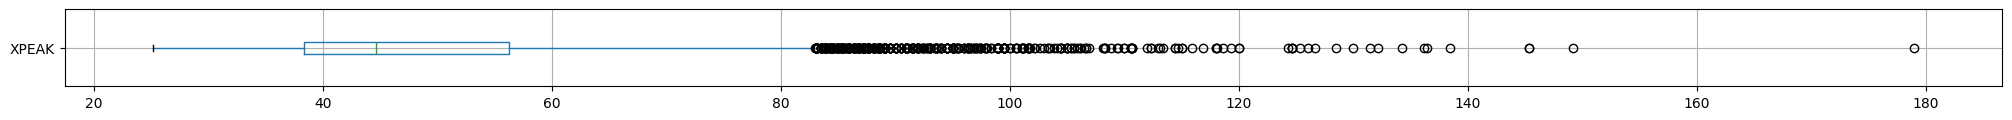

In [19]:
_ = X_train.boxplot(column=['XPEAK'], figsize=[25,1], vert=False)

In [20]:
X_train = X_train[X_train.XPEAK < upper_threshold_XPEAK].copy()

In [21]:
_ = X_train.boxplot(column=['XPEAK'], figsize=[25,1], vert=False)

In [22]:
upper_threshold_YPEAK = X_train.YPEAK.mean() + 9*X_train.YPEAK.std()
upper_threshold_YPEAK

185.99356958435482

In [23]:
X_train.YPEAK.max()

200.0

In [24]:
_ = X_train.boxplot(column=['YPEAK'], figsize=[25,1], vert=False)

In [25]:
X_train = X_train[X_train.YPEAK < upper_threshold_YPEAK].copy()

In [26]:

_ = X_train.boxplot(column=['YPEAK'], figsize=[25,1], vert=False)

In [27]:
upper_threshold_ZPEAK = X_train.ZPEAK.mean() + 9*X_train.ZPEAK.std()
upper_threshold_ZPEAK

151.17200264938472

In [28]:
X_train.ZPEAK.max()

173.0

In [29]:
_ = X_train.boxplot(column=['ZPEAK'], figsize=[25,1], vert=False)


In [30]:
X_train = X_train[X_train.ZPEAK < upper_threshold_ZPEAK].copy()

In [31]:
_ = X_train.boxplot(column=['ZPEAK'], figsize=[25,1], vert=False)



In [32]:

y_train = X_train['Y']

In [33]:
y_train

7469     R
434      F
16609    S
5917     D
16265    K
        ..
2201     P
10430    M
10196    S
37       C
845      G
Name: Y, Length: 15483, dtype: object

In [34]:

X_train.drop(['Y'], axis = 1, inplace = True)

In [35]:
from sklearn.preprocessing import MaxAbsScaler

scaling_transformer = MaxAbsScaler().fit(X_train[['XAVG', 'YAVG', 'ZAVG', 'XPEAK', 'YPEAK', 'ZPEAK', 'XABSOLDEV', 'YABSOLDEV', 'ZABSOLDEV', 'RESULTANT']])

In [36]:
X_train[['XAVG', 'YAVG', 'ZAVG', 'XPEAK', 'YPEAK', 'ZPEAK', 'XABSOLDEV', 'YABSOLDEV', 'ZABSOLDEV', 'RESULTANT']] = scaling_transformer.transform(X_train[['XAVG', 'YAVG', 'ZAVG', 'XPEAK', 'YPEAK', 'ZPEAK', 'XABSOLDEV', 'YABSOLDEV', 'ZABSOLDEV', 'RESULTANT']])

In [37]:
X_test = X_test.copy()


In [38]:
X_test[['XAVG', 'YAVG', 'ZAVG', 'XPEAK', 'YPEAK', 'ZPEAK', 'XABSOLDEV', 'YABSOLDEV', 'ZABSOLDEV', 'RESULTANT']] = scaling_transformer.transform(X_test[['XAVG', 'YAVG', 'ZAVG', 'XPEAK', 'YPEAK', 'ZPEAK', 'XABSOLDEV', 'YABSOLDEV', 'ZABSOLDEV', 'RESULTANT']])

In [39]:
X_test

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,ZMFCC11,ZMFCC12,XYCOS,XZCOS,YZCOS,XYCOR,XZCOR,YZCOR,RESULTANT,PARTICIPANT
7605,0.00,0.010,0.215,0.540,0.150,0.055,0.020,0.010,0.000,0.000,...,0.516583,0.509944,-0.886198,0.809902,-0.847208,-0.461405,0.257276,-0.329999,0.424228,1626
11153,0.00,0.000,0.000,0.985,0.015,0.000,0.000,0.000,0.000,0.000,...,0.415005,0.409672,-0.999915,-0.999955,0.999949,0.234890,0.171072,-0.052944,0.432902,1634
10287,0.00,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.036548,0.036079,-0.991466,-0.988137,0.990119,0.574899,-0.330351,-0.343983,0.419373,1632
1665,0.00,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,...,0.342165,0.337768,0.999980,0.999985,0.999976,0.017669,0.130126,0.034667,0.400655,1604
11877,1.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.269424,0.265962,0.999927,-0.999779,-0.999775,0.113957,0.742037,0.210451,0.418372,1635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2927,1.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.311639,0.307635,0.999894,-0.999713,-0.999845,0.292850,0.468166,0.477435,0.422232,1607
16360,0.04,0.120,0.530,0.225,0.050,0.030,0.000,0.005,0.000,0.000,...,0.460341,0.454426,-0.560794,-0.598620,0.824675,0.274891,-0.221788,-0.030825,0.423023,1644
3851,0.00,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,...,-0.013483,-0.013310,0.999649,-0.969785,-0.963953,-0.566200,-0.794211,0.766851,0.412920,1610
7552,0.13,0.135,0.160,0.175,0.150,0.125,0.065,0.030,0.015,0.015,...,0.627756,0.619689,-0.816913,0.194049,-0.264033,-0.756705,-0.052280,-0.094694,0.505172,1626


In [40]:
X_train.reset_index(drop = True, inplace = True)
X_train

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,ZMFCC11,ZMFCC12,XYCOS,XZCOS,YZCOS,XYCOR,XZCOR,YZCOR,RESULTANT,PARTICIPANT
0,1.000,0.00,0.000,0.000,0.00,0.00,0.000,0.0,0.0,0.0,...,0.300748,0.296883,0.999099,-0.999638,-0.998990,-0.679099,-0.328830,0.587202,0.414504,1625
1,1.000,0.00,0.000,0.000,0.00,0.00,0.000,0.0,0.0,0.0,...,0.426537,0.421056,0.611218,-0.994210,-0.650857,-0.533807,0.659599,-0.154094,0.419283,1601
2,0.010,0.75,0.240,0.000,0.00,0.00,0.000,0.0,0.0,0.0,...,0.165780,0.163650,0.630299,-0.310674,-0.128660,-0.299830,-0.296058,0.148296,0.402172,1644
3,1.000,0.00,0.000,0.000,0.00,0.00,0.000,0.0,0.0,0.0,...,0.095400,0.094174,0.992745,-0.996764,-0.985026,0.411790,0.150032,0.436387,0.426763,1622
4,0.000,0.00,1.000,0.000,0.00,0.00,0.000,0.0,0.0,0.0,...,0.028213,0.027851,-0.957191,0.980278,-0.929747,0.755735,0.841647,0.808091,0.403507,1644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15478,0.105,0.39,0.415,0.090,0.00,0.00,0.000,0.0,0.0,0.0,...,0.483838,0.477621,-0.003318,0.108898,-0.076691,-0.020924,0.109508,0.491097,0.436072,1605
15479,0.020,0.16,0.515,0.190,0.09,0.02,0.005,0.0,0.0,0.0,...,0.573894,0.566519,-0.553811,-0.475387,0.629607,-0.011997,-0.189647,0.172296,0.444696,1632
15480,0.000,0.00,0.965,0.035,0.00,0.00,0.000,0.0,0.0,0.0,...,0.186930,0.184528,0.936608,-0.692194,-0.795967,-0.458628,0.275926,0.148845,0.424812,1631
15481,0.220,0.64,0.140,0.000,0.00,0.00,0.000,0.0,0.0,0.0,...,0.439829,0.434177,-0.763273,-0.051482,0.082496,-0.423615,0.011866,0.008433,0.433969,1600


In [41]:
X_test.reset_index(drop = True, inplace = True)
X_test

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,ZMFCC11,ZMFCC12,XYCOS,XZCOS,YZCOS,XYCOR,XZCOR,YZCOR,RESULTANT,PARTICIPANT
0,0.00,0.010,0.215,0.540,0.150,0.055,0.020,0.010,0.000,0.000,...,0.516583,0.509944,-0.886198,0.809902,-0.847208,-0.461405,0.257276,-0.329999,0.424228,1626
1,0.00,0.000,0.000,0.985,0.015,0.000,0.000,0.000,0.000,0.000,...,0.415005,0.409672,-0.999915,-0.999955,0.999949,0.234890,0.171072,-0.052944,0.432902,1634
2,0.00,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.036548,0.036079,-0.991466,-0.988137,0.990119,0.574899,-0.330351,-0.343983,0.419373,1632
3,0.00,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,...,0.342165,0.337768,0.999980,0.999985,0.999976,0.017669,0.130126,0.034667,0.400655,1604
4,1.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.269424,0.265962,0.999927,-0.999779,-0.999775,0.113957,0.742037,0.210451,0.418372,1635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5158,1.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.311639,0.307635,0.999894,-0.999713,-0.999845,0.292850,0.468166,0.477435,0.422232,1607
5159,0.04,0.120,0.530,0.225,0.050,0.030,0.000,0.005,0.000,0.000,...,0.460341,0.454426,-0.560794,-0.598620,0.824675,0.274891,-0.221788,-0.030825,0.423023,1644
5160,0.00,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,...,-0.013483,-0.013310,0.999649,-0.969785,-0.963953,-0.566200,-0.794211,0.766851,0.412920,1610
5161,0.13,0.135,0.160,0.175,0.150,0.125,0.065,0.030,0.015,0.015,...,0.627756,0.619689,-0.816913,0.194049,-0.264033,-0.756705,-0.052280,-0.094694,0.505172,1626


In [42]:
y_train.reset_index(drop = True, inplace = True)
y_train

0        R
1        F
2        S
3        D
4        K
        ..
15478    P
15479    M
15480    S
15481    C
15482    G
Name: Y, Length: 15483, dtype: object

In [43]:
y_test.reset_index(drop = True, inplace = True)
y_test

0       C
1       K
2       E
3       F
4       Q
       ..
5158    Q
5159    M
5160    D
5161    B
5162    D
Name: ACTIVITY, Length: 5163, dtype: object

In [ ]:

def visualize_tree(model, md=5, width=800):
    dot_data = StringIO()  
    export_graphviz(model, out_file=dot_data, feature_names=X_train.columns, max_depth=md)
    graph = pydot.graph_from_dot_data(dot_data.getvalue())[0]  
    return Image(graph.create_png(), width=width) 

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from time import time

# For the tree models
from sklearn.metrics import log_loss
from sklearn.tree import DecisionTreeClassifier, export_graphviz

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import warnings


#!pip install pydot


In [45]:
dt_classifier = DecisionTreeClassifier()

In [46]:
my_param_grid = {'min_samples_leaf': [6, 10, 20, 40],
                 'min_weight_fraction_leaf': [0.01, 0.02, 0.05],
                 'criterion': ['entropy'],
                 'min_impurity_decrease': [1e-2, 7e-3]}

In [47]:
dt_model_gs = GridSearchCV(estimator=dt_classifier, 
                           param_grid=my_param_grid, 
                           cv=my_cv, 
                           scoring='accuracy',
                           verbose = 0,
                           return_train_score = True)

In [48]:
dt_model_gs.fit(X_train, y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=None, test_size=0.3,
            train_size=0.7),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy'],
                         'min_impurity_decrease': [0.01, 0.007],
                         'min_samples_leaf': [6, 10, 20, 40],
                         'min_weight_fraction_leaf': [0.01, 0.02, 0.05]},
             return_train_score=True, scoring='accuracy')

In [49]:
dt_model_gs.best_params_

{'criterion': 'entropy',
 'min_impurity_decrease': 0.007,
 'min_samples_leaf': 6,
 'min_weight_fraction_leaf': 0.01}

In [50]:

dt_best_classifier = dt_model_gs.best_estimator_

In [51]:

dt_model_gs.cv_results_

{'mean_fit_time': array([3.16511221, 2.49362092, 2.01443348, 3.31812487, 3.7406198 ,
        2.05194731, 3.04150152, 2.30862885, 1.53312054, 2.65437226,
        2.48512449, 1.33643103, 2.33182654, 1.93456922, 1.26195416,
        2.251752  , 1.91971016, 1.2707787 , 2.32205148, 1.88394985,
        1.288135  , 2.2392673 , 1.90878167, 1.23081141]),
 'std_fit_time': array([0.20109193, 0.10465502, 0.21008124, 0.24589334, 0.86648047,
        0.16002543, 0.36958027, 0.06352251, 0.02201747, 0.09633962,
        0.6592379 , 0.07632837, 0.06690692, 0.01931409, 0.03163966,
        0.07422248, 0.05367898, 0.04692096, 0.08088708, 0.06268892,
        0.03384159, 0.0543208 , 0.07312633, 0.02972129]),
 'mean_score_time': array([0.01644373, 0.01138539, 0.01836643, 0.03751674, 0.02789774,
        0.0177774 , 0.01332159, 0.01141853, 0.01128511, 0.01339364,
        0.00912714, 0.01086965, 0.01320081, 0.00968971, 0.01118898,
        0.00857015, 0.00935659, 0.01039243, 0.00875802, 0.01142297,
        0.009586

In [52]:
dt_best_classifier.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.007,
 'min_samples_leaf': 6,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.01,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [53]:
dt_best_classifier.get_depth()

9

In [54]:
dt_best_classifier.get_n_leaves()

52

In [55]:
scores = cross_val_score(dt_best_classifier, X_train, y_train, cv=my_cv, scoring='accuracy')
list(scores)

[0.34079655543595266,
 0.3395048439181916,
 0.3371367061356297,
 0.3506996770721206,
 0.3321851453175457]

In [56]:

dt_best_classifier.score(X_train, y_train)

0.35865142414260803

Applying model to train set first, just to verify that there is no substantial overfitting

In [57]:
y_train_pred = dt_best_classifier.predict(X_train)
#print(pd.DataFrame(y_train_pred))


In [58]:
accuracy_score(y_true=y_train, y_pred=y_train_pred)

0.35865142414260803

In [59]:
log_loss(y_train, dt_best_classifier.predict_proba(X_train))

c:\Users\Vaibhav Saxena\anaconda3\envs\hari\lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


1.788608445241321


**Applying the best dt model to the test set:**

In [60]:
y_test

0       C
1       K
2       E
3       F
4       Q
       ..
5158    Q
5159    M
5160    D
5161    B
5162    D
Name: ACTIVITY, Length: 5163, dtype: object

In [61]:
y_test_pred = dt_best_classifier.predict(X_test)
print(pd.DataFrame(y_test_pred))

      0
0     C
1     Q
2     E
3     Q
4     G
...  ..
5158  Q
5159  M
5160  Q
5161  B
5162  P

[5163 rows x 1 columns]


In [62]:
cm = confusion_matrix(y_true=y_test,
                      y_pred=y_test_pred)
#                      y_pred=y_test_pred, normalize = 'true')
    
cm_act = pd.DataFrame(cm,
                      index=dt_best_classifier.classes_,
                      columns=dt_best_classifier.classes_)

cm_act.columns = activity_codes_mapping.values()
cm_act.index = activity_codes_mapping.values()
cm_act

,walking,jogging,stairs,sitting,standing,typing,brushing teeth,eating soup,eating chips,eating pasta,drinking from cup,eating sandwich,kicking soccer ball,playing catch tennis ball,dribbling basket ball,writing,clapping,folding clothes
walking,194,16,62,0,0,0,0,0,0,0,1,0,7,0,12,0,0,0
jogging,16,272,8,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0
stairs,69,12,142,0,0,0,0,0,0,0,0,0,28,0,16,0,0,1
sitting,2,2,7,86,13,0,9,14,9,0,5,34,2,3,4,35,47,17
standing,2,1,1,2,155,0,8,0,0,0,6,1,3,7,1,35,5,67
typing,0,1,2,48,21,0,1,13,17,0,9,15,3,2,0,90,35,11
brushing teeth,0,0,7,19,27,0,79,3,10,0,10,10,7,8,0,26,42,46
eating soup,0,0,1,24,2,0,31,37,14,0,16,33,1,7,1,17,70,32
eating chips,1,0,2,38,7,0,29,13,42,0,10,35,1,5,0,17,60,22
eating pasta,0,0,1,26,27,0,24,35,7,0,11,8,1,8,0,34,64,23


In [63]:
sns.set(font_scale=1.6)
fig, ax = plt.subplots(figsize=(12,10))
#sns.set(font_scale=1.6)   
_ = sns.heatmap(cm_act, cmap="YlGnBu")
#sns.heatmap(cm_act, cmap="Greens")

In [64]:
sns.set(font_scale=1.2)

In [65]:
accuracy_per_activity = pd.DataFrame([cm_act.iloc[i][i]/np.sum(cm_act.iloc[i]) for i in range(18)],index=activity_codes_mapping.values())
accuracy_per_activity

C:\Users\Vaibhav Saxena\AppData\Local\Temp\ipykernel_19416\423353854.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  accuracy_per_activity = pd.DataFrame([cm_act.iloc[i][i]/np.sum(cm_act.iloc[i]) for i in range(18)],index=activity_codes_mapping.values())


,0
walking,0.664384
jogging,0.909699
stairs,0.529851
sitting,0.297578
standing,0.527211
typing,0.000000
brushing teeth,0.268707
eating soup,0.129371
eating chips,0.148936
eating pasta,0.000000


In [66]:
print(classification_report(y_true=y_test,
                            y_pred=y_test_pred))

              precision    recall  f1-score   support

           A       0.57      0.66      0.61       292
           B       0.78      0.91      0.84       299
           C       0.41      0.53      0.46       268
           D       0.22      0.30      0.25       289
           E       0.50      0.53      0.51       294
           F       0.00      0.00      0.00       268
           G       0.31      0.27      0.29       294
           H       0.23      0.13      0.17       286
           I       0.30      0.15      0.20       282
           J       0.00      0.00      0.00       269
           K       0.21      0.11      0.14       301
           L       0.20      0.17      0.18       283
           M       0.44      0.61      0.51       299
           O       0.30      0.18      0.22       290
           P       0.26      0.08      0.13       287
           Q       0.24      0.40      0.30       283
           R       0.22      0.45      0.29       291
           S       0.29    

c:\Users\Vaibhav Saxena\anaconda3\envs\hari\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Vaibhav Saxena\anaconda3\envs\hari\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Vaibhav Saxena\anaconda3\envs\hari\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

In [67]:
accuracy_score(y_true=y_test, y_pred=y_test_pred)

0.3486345148169669

In [68]:
log_loss(y_test, dt_best_classifier.predict_proba(X_test))

c:\Users\Vaibhav Saxena\anaconda3\envs\hari\lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


1.9654358229540296